# Logistic Regression

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
df = pd.read_csv('auto.csv')
df 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,2.890372,8,5.726848,0,3504,12.000000,70,0
1,2.708050,8,5.857933,1,3693,11.500000,70,0
2,2.890372,8,5.762051,2,3436,11.000000,70,0
3,2.772589,8,5.717028,2,3433,12.000000,70,0
4,2.833213,8,5.710427,3,3449,10.500000,70,0
...,...,...,...,...,...,...,...,...
392,3.295837,4,4.941642,30,2790,15.600000,82,0
393,3.784190,4,4.574711,56,2130,23.838241,82,1
394,3.465736,4,4.905275,89,2295,11.600000,82,0
395,3.332205,4,4.787492,67,2625,18.600000,82,0


# Data preparation

In [89]:
p=['horsepower','cylinders','displacement','model year']

In [94]:
X = df[p]
y = df['origin']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [95]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# Feature Selection

In [96]:
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

ValueError: endog must be in the unit interval.

In [97]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

3
[False  True  True  True]
[2 1 1 1]


# Fitting Logistic Regression

In [98]:
X_train_select=X_train[:,[False, False,  True, True]]
X_test_select=X_test[:,[False, False,  True, True]]

In [99]:
X_train_select

array([[-0.62075965,  0.25908157],
       [ 0.04655385,  0.8029813 ],
       [-0.20732647,  1.07493116],
       [-1.0142832 ,  0.53103144],
       [ 1.36716738, -1.10066774],
       [ 0.53711428, -0.28481815],
       [-0.63625024, -1.10066774],
       [-0.47253851,  0.53103144],
       [ 1.18286836, -0.01286829],
       [-0.76503273,  1.61883089],
       [-0.43027393,  1.07493116],
       [-1.58976028, -1.37261761],
       [-0.60539655, -0.82871788],
       [ 0.53711428, -0.55676802],
       [ 0.59430142, -0.55676802],
       [-1.17323925, -0.28481815],
       [ 0.29849977, -0.55676802],
       [-1.05277127, -1.10066774],
       [-1.03342804,  0.25908157],
       [ 1.61109228,  0.25908157],
       [-0.3485117 , -1.37261761],
       [-0.63625024,  1.07493116],
       [-0.48684207, -0.01286829],
       [ 0.73378082, -1.37261761],
       [-0.65187047,  1.07493116],
       [-0.69953107, -0.01286829],
       [-0.20732647,  1.61883089],
       [ 0.53711428, -1.37261761],
       [-1.25809958,

In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [101]:
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(3)

0.725

Можно сделать вывод,что модель в 72% работает корректно 

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42  1  4]
 [ 4  6  3]
 [ 7  3 10]]


# Visualising

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


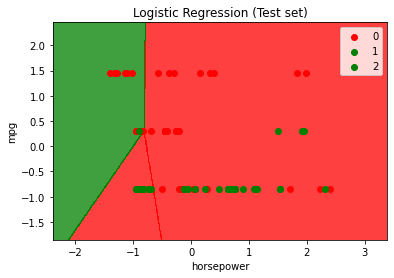

In [104]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [105]:
import pickle
obj = {'X_train': X_train_select, 'X_test': X_test_select,'y_train': y_train,'y_test': y_test}
output = open('data1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()